In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

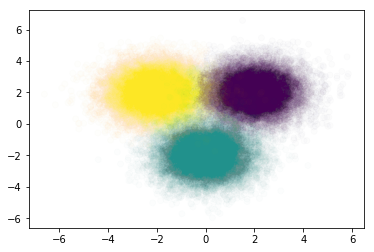

In [2]:
D = 2
K = 3
N = int(K*1.5e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.01)

In [3]:
# Functions

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis = 1) == P.argmax(axis = 1))

In [4]:
# Data Prep

Y = one_hot_encode(y)

In [5]:
# Creat Initial Weights

M = 4

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

Accuracy w/ Nesterov Momentum: 0.96


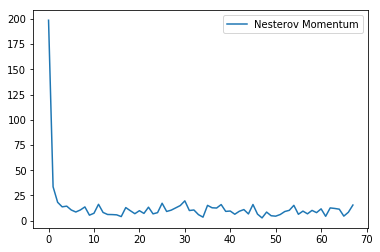

In [6]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_n_m = []

eta = 1e-5
mu = 0.9

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        J_n_m.append(cross_entropy(Y_b,P_b))
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        vW2 = mu*vW2 - eta*dW2
        vb2 = mu*vb2 - eta*dH2.sum(axis = 0)
        W2 += mu*vW2 - eta*dW2
        b2 += mu*vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        vW1 = mu*vW1 - eta*dW1
        vb1 = mu*vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*vW1 - eta*dW1
        b1 += mu*vb1 - eta*dH1.sum(axis = 0)
        
P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy w/ Nesterov Momentum: {}".format(accuracy(Y_b,P_b)))

plt.plot(J_n_m[::100], label = "Nesterov Momentum")
plt.legend()

Accuracy w/ Nesterov Momentum: 0.99


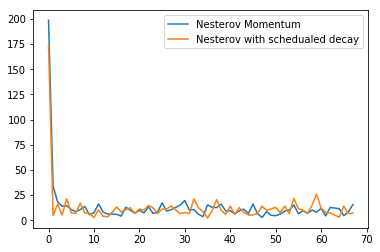

In [13]:
#Schedualed Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_n_m2 = []
etas = []
eta = 1e-3
etanot = eta
mu = 0.9

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

k = .1
index = 0
Tee = 1000


batch_sz = 100
n_batches = N//batch_sz

epochs = 15

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        eta =  etanot *(k/((index//Tee)+1)) #update is here
        etas.append(eta)
        index += 1
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        J_n_m2.append(cross_entropy(Y_b,P_b))
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        vW2 = mu*vW2 - eta*dW2
        vb2 = mu*vb2 - eta*dH2.sum(axis = 0)
        W2 += mu*vW2 - eta*dW2
        b2 += mu*vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        vW1 = mu*vW1 - eta*dW1
        vb1 = mu*vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*vW1 - eta*dW1
        b1 += mu*vb1 - eta*dH1.sum(axis = 0)
        
P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy w/ Nesterov Momentum: {}".format(accuracy(Y_b,P_b)))

plt.plot(J_n_m[::100], label = "Nesterov Momentum")
plt.plot(J_n_m2[::100], label = "Nesterov with schedualed decay")
plt.legend()

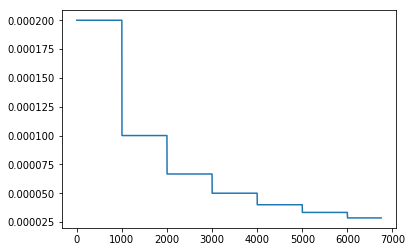

In [8]:
plt.plot(etas)

Accuracy w/ Nesterov Momentum: 0.98


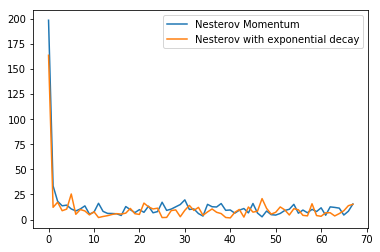

In [9]:
#Inverse Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_n_m2 = []
etas = []

eta = 1e-3
mu = 0.9

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

k = .0001
index = 1
Tee = 1000

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        eta =  eta*np.exp(-k*index) #update is here
        etas.append(eta)
        index += 1
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        J_n_m2.append(cross_entropy(Y_b,P_b))
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        vW2 = mu*vW2 - eta*dW2
        vb2 = mu*vb2 - eta*dH2.sum(axis = 0)
        W2 += mu*vW2 - eta*dW2
        b2 += mu*vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        vW1 = mu*vW1 - eta*dW1
        vb1 = mu*vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*vW1 - eta*dW1
        b1 += mu*vb1 - eta*dH1.sum(axis = 0)
        
P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy w/ Nesterov Momentum: {}".format(accuracy(Y_b,P_b)))

plt.plot(J_n_m[::100], label = "Nesterov Momentum")
plt.plot(J_n_m2[::100], label = "Nesterov with exponential decay")
plt.legend()

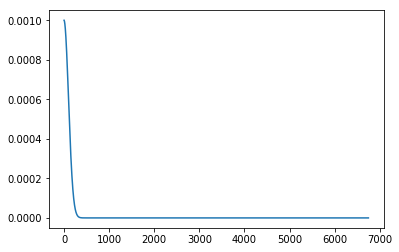

In [10]:
plt.plot(etas)

Accuracy w/ Nesterov Momentum: 0.96


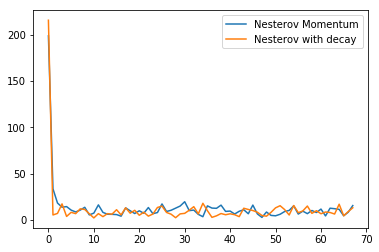

In [11]:
#Inverse Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

etas = []
J_n_m2 = []

eta = 1e-4
etanot = eta
mu = 0.9

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

k = .01
index = 0
Tee = 1000

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        eta =  etanot /((k*index)+1) #update is here
        etas.append(eta)
        index += 1
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        J_n_m2.append(cross_entropy(Y_b,P_b))
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        vW2 = mu*vW2 - eta*dW2
        vb2 = mu*vb2 - eta*dH2.sum(axis = 0)
        W2 += mu*vW2 - eta*dW2
        b2 += mu*vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        vW1 = mu*vW1 - eta*dW1
        vb1 = mu*vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*vW1 - eta*dW1
        b1 += mu*vb1 - eta*dH1.sum(axis = 0)
        
P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy w/ Nesterov Momentum: {}".format(accuracy(Y_b,P_b)))

plt.plot(J_n_m[::100], label = "Nesterov Momentum")
plt.plot(J_n_m2[::100], label = "Nesterov with decay")
plt.legend()

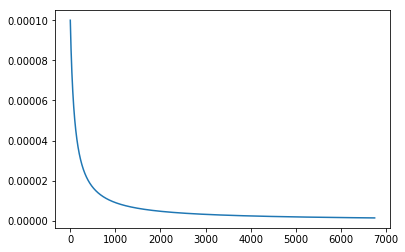

In [12]:
plt.plot(etas)